In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Import    

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.sample(5)

,Age,EstimatedSalary,Purchased
199,35,22000,0
180,26,16000,0
85,31,118000,1
282,37,70000,1
295,36,63000,0


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Train test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [14]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Prediction

In [15]:
# Predict a customer that is 30yo with estimated salary of $87K
classifier.predict(sc.transform([[30,87000]]))

array([0])

In [16]:
# Predicting test set results
y_pred = classifier.predict(X_test)

# Evaluation

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
cf = confusion_matrix(y_test,y_pred)

In [19]:
import seaborn as sns

Accuracy: 0.93


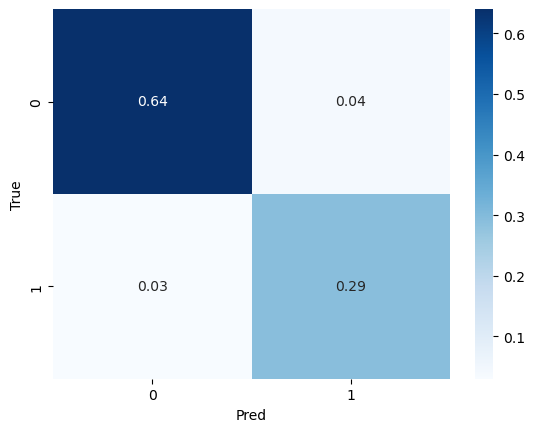

In [22]:
sns.heatmap(cf/cf.sum(),annot=True,cmap='Blues')
plt.ylabel('True')
plt.xlabel('Pred')
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

# Visualisation

## Training

/var/folders/82/b18r5lg13lj0jsssnjzrfj780000gn/T/ipykernel_2185/2276498564.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


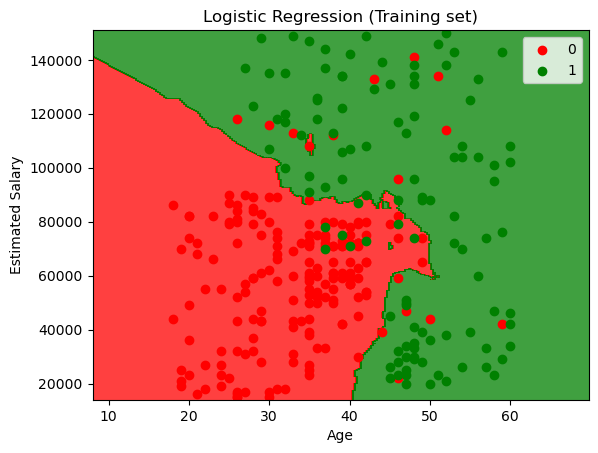

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Test

/var/folders/82/b18r5lg13lj0jsssnjzrfj780000gn/T/ipykernel_2185/3848652112.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


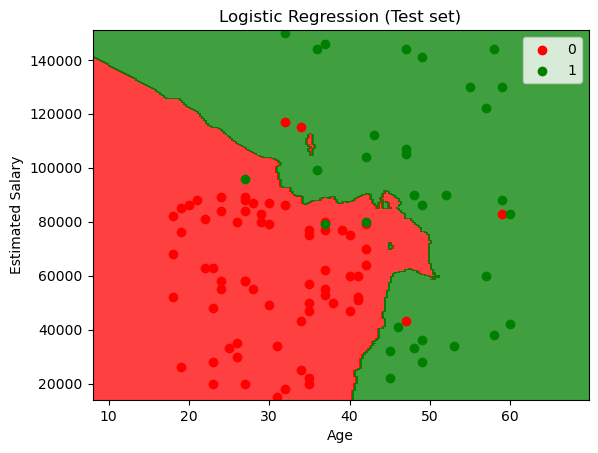

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()